# Statistical distribution and NumPy/Matplotlib

### Plotting datasets

In [14]:
import numpy as np
from matplotlib import pyplot as plt

When we first look at a dataset, we want to
    - determine if some values occur more than others  
    - determine the min and max values, or dataset range  
    - identify any outliers
    
We can visualize this with a histogram

If we have a dataset with values from 0-50, instead of determining how many, 0s, 1s,2s, etc, there are. We may be interested in knowing how many values there are between 0-5, 6-10, etc. These groupings are called `bins`.

`Bins` are always the same size. There width is the distance from the min-max value of the bin, in this example 5.

Histograms are graphed using the `Matplotlib` package

Automatically make a histogram with 10 bins of equal width that span the entire range of our data.

```py
plt.hist([numpy array])

plt.show() # plot the graph
```

If you want a different number of bins, use the keyword bins

```py
plt.hist([numpy array], bins=5) # create 5 equal size bins
```

If you want a different range, you can pass in the minimum and maximum values that you want to histogram using the keyword range. Pass in a tuple of two numbers. The first number is the minimum value that we want to plot and the second value is the number that we want to plot up to, but not including.

 If our dataset contained values between 0 and 100, but we only wanted to histogram numbers between 20 and 50

```py
plt.hist([numpy array], range=(20, 51)) # default 10 bins
```

In [5]:
d = np.array([1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5])

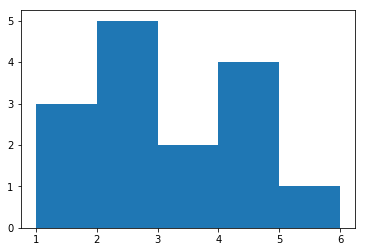

In [10]:
plt.hist(d, range=(1,6), bins=5)
plt.show()

Histograms can be classified based on the shape of the graphed values
    - `Unimodal distribution` has one distinct peak  
    - `Bimodal distribution` has two distict peaks - dataset has two distict populations  
    - `Multimodal distribution` has more than two peaks
    - `Uniform distribution` does not have any distinct peaks

`Unimodal distributions` can be further classified
    - `symmetrical` - has approx. equal numbers of values either side of the dataset. The `mean` and `median` values are approx. the same.
    - `skew-right` has a long tail on the right of the peak(peak is to the left, tail to the right), but most of the data is on the left(median value is less than the mean/avg)
    - `skew-left` has a long tail on the left of the peak(peak is to the right, tail to the left), but most of the data is on the right(median value is greater than the mean) 

### Normal distribution

The most common distribution, unimodal, symmetric distribution. Common example, peoples height, blood pressure of healthy individuals

Normal distributions are defined by their mean and standard deviation. The mean sets the "middle" of the distribution, and the standard deviation sets the "width" of the distribution. A larger standard deviation leads to a wider distribution, and vice versa.

We can generate our own normally distributed datasets using NumPy.

To create these datasets we need a random number generator. NumPy includes several functions for generating random numbers, including one specifically for generating sets of numbers that fit a normal distribution: `np.random.normal()`

This function takes 3 arguments:

    - loc: the mean for the normal distribution
    - scale: the standard deviation of the distribution
    - size: the number of random numbers to generate

In [32]:
a = np.random.normal(0, 1, size=100000)
print(a)

[-0.12972245 -1.16645306  1.48914204 ... -1.0789261   1.09069901
 -1.99552535]


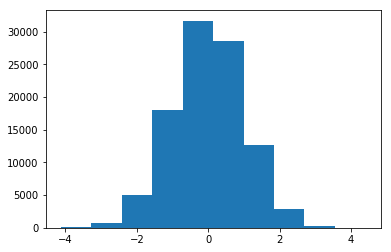

In [33]:
plt.hist(a)
plt.show()

### Example

Our friend is a paleontologist. He's studying two types of dinosaurs: brachiosaurus and fictionosaurus. He tells us that:

Brachiosaurus have femurs (thigh bone) with mean length of 6.7 ft and a standard deviation of 0.7 ft.
Fictionosaurus have femurs (thigh bone) with mean length of 7.7 ft and a standard deviation of 0.3 ft.
We'd like to know what these distributions look like.

Use np.random.normal to fill in b_data (brachiosaurus) and f_data (fictionosaurus) with randomly generated samples with the correct mean and standard deviation. Each dataset should have 1000 samples.

In [34]:
# Brachiosaurus
b_data = np.random.normal(6.7, 0.7,1000)

In [35]:
# Fictionosaurus
f_data = np.random.normal(7.7, 0.3, 1000)

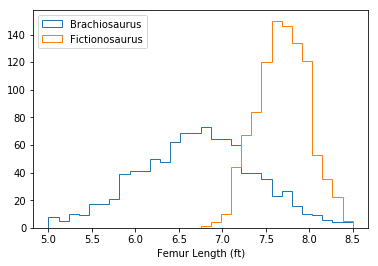

In [37]:
plt.hist(b_data,
         bins=30, range=(5, 8.5), histtype='step',
         label='Brachiosaurus')
plt.hist(f_data,
         bins=30, range=(5, 8.5), histtype='step',
         label='Fictionosaurus')
plt.xlabel('Femur Length (ft)')
plt.legend(loc=2)
plt.show()

### Mean and Standard Deviation

When comparing mean with standard deviation we can say:

**68%** of our samples will fall between +/- 1 standard deviation of the mean(no matter the mean or std deviation)

**95%** of our samples will fall between +/- 2 standard deviations of the mean

**99.7%** of our samples will fall between +/- 3 standard deviations of the mean

Suppose that we have a normal distribution with a mean of 50 and a standard deviation of 10. When we say "within one standard deviation of the mean", we'are saying that 68% of the results will lie within the range 40-60(50 +/-10), 40 being the lower bound(one below), and 60 being the upper band(one above).

Thus if the data set were of 1000 samples, 680(or 68%) would be within the one std (40-60) range.

### Binomial Distribution

Tells us how likely it is for a certain number of “successes” to happen, given a probability of success and a number of trials(helping us understand the different probabilities that an event will occur)

If a certain basketball player makes 30% of his free throws. Thus if he throws 10 baskets, we expect him to make 3 (30%) free throws.

Binomial distribution is important because it allows us to know how likely a certain outcome is, even when it's not the expected one, i.e. making 4 free throws out of 10 baskets thrown. By plotting the distribution you can visually see how likely it is to get 4, 5 or more free throws.

We can use NumPy's ability to generate a binomial distribution using `np.random.binomial()` to determine the probability of different outcomes.

The function takes 3 arguments:
    - N: The number of samples or trials
    - P: The probability of success
    - size: The number of experiments

Using our basketball player, and choosing a large number of experiments(to be sure that our probabilities converge on the correct answer)

In [39]:
# Let's generate 10,000 "experiments"
# N = 10 shots
# P = 0.30 (30% he'll get a free throw)

a = np.random.binomial(10, 0.30, size=10000)

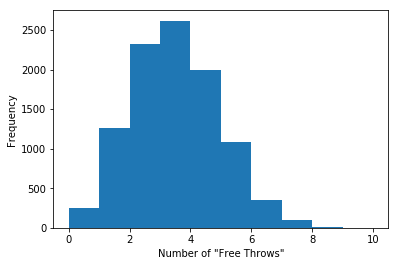

In [46]:
plt.hist(a, range=(0, 10), bins=10)
plt.xlabel('Number of "Free Throws"')
plt.ylabel('Frequency')
plt.show()

What percent chance did he have of making those 4 shots?

We can calculate the probability(percentage chance) using the `np.mean()` function. Remember that taking the mean of a logical statement will give us the percent of values that satisfy our logical statement.

In [49]:
# calculate the probability that he makes 4 baskets
a = np.random.binomial(10, 0.30, size=10000)
np.mean(a == 4)

0.1963

Our basketball player has a roughly 20% chance of making 4 baskets.

Note: because we're using a random number generator, we'll get a slightly different result each time. With the large size we chose, the calculated probability should be accurate to about 2 decimal places.

#### Example

A person sends 500 emails asking people to donate to their cause, with an estimated probability that 25 people (5%) will open the email and click to donate. There were 10,000 experiments.

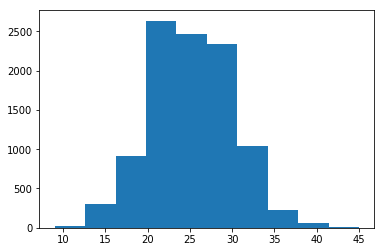

In [47]:
emails = np.random.binomial(500, 0.05, 10000)
plt.hist(emails)
plt.show()

In [50]:
# What is the probability that no one opens the email?
no_emails = np.mean(emails == 0)
print(no_emails)

0.0


In [54]:
# What’s the probability that 8% or more of people will open the email?
# 8% of 500 emails is 40, so we want to know how many experiments had 40 or more emails opened
b_test_emails = np.mean(emails >= 40)
print(b_test_emails)

0.0022


### Example - Election Results

In [55]:
survey_responses = ['Ceballos', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos','Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 
'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos',
'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos',
'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos']

In [60]:
total_ceballos = survey_responses.count('Ceballos')
print(total_ceballos)

33


In [61]:
total_kerrigan = survey_responses.count('Kerrigan')
print(total_kerrigan)

37


In [62]:
len(survey_responses) == total_ceballos + total_kerrigan

True

In [77]:
percentage_ceballos = total_ceballos / float(len(survey_responses)) * 100
print(percentage_ceballos)

47.14285714285714


In the real election, 54% of the 10,000 town population voted for Cynthia Ceballos. Your supervisors are concerned because this is a very different outcome than what the poll predicted.

Generate a binomial distribution that takes the number of total survey responses, the actual success rate, and the size of the town's population as its parameters. Then divide the distribution by the number of survey responses.

In [75]:
possible_surveys = np.random.binomial(len(survey_responses), 0.54, 10000)/70.
print(possible_surveys)

[0.47142857 0.62857143 0.55714286 ... 0.55714286 0.55714286 0.57142857]


NOTE: we've divided the result by the survey size to scale it to our survey size.

Also, notice the period at the end of the line of code above. The period ensures that you are dividing each element in a by a float. OR you can wrap your int variable in `float()` method.

If you do not include the period, Python will assume you want integer division (an integer divided by an integer). Naturally, integer division returns an integer. For quotients less than 1 (for example, 7 divided by 18), this is problematic. Python will return a 0 (as opposed to a decimal, like 0.388), which can result in erroneous calculations.

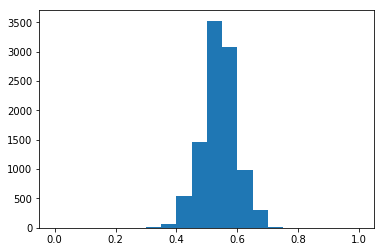

In [78]:
# since we're plotting percentages, set the range from 0-1 since all percentages will fall within this range
plt.hist(possible_surveys, range=(0,1), bins=20)
plt.show()

As we saw, 47% of people we surveyed said they would vote for Ceballos, but 54% of people voted for Ceballos in the actual election.

Calculate the percentage of surveys that could have an outcome of Ceballos receiving less than 50% of the vote and save it to the variable ceballos_loss_surveys.

In [81]:
# possible_surveys_length = float(len(possible_surveys))
# incorrect_predictions = len(possible_surveys[possible_surveys < 0.5])
# ceballos_loss_surveys = incorrect_predictions / possible_surveys_length

ceballos_loss_surveys = np.mean(possible_surveys < 0.5) # % chance that we get the wrong prediction
print(ceballos_loss_surveys)

0.2086


With this current poll, about 20% of the time a survey output would predict Kerrigan winning, even if Ceballos won the actual election.

Your co-worker points out that your poll would be more accurate if it had more responders.

Generate another binomial distribution, but this time, see what would happen if you had instead surveyed 7,000 people. Divide the distribution by the size of the survey and save your findings to large_survey.

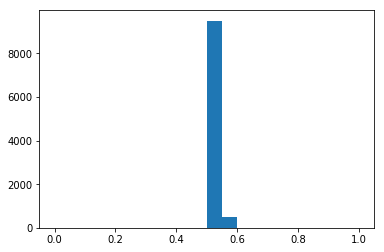

In [85]:
# rpt but with a larger survey length
large_survey_size = float(7000)
large_survey = np.random.binomial(large_survey_size, 0.54, 10000) / large_survey_size
plt.close()
plt.hist(large_survey, range=(0,1), bins=20)
plt.show()

Now, recalculate the percentage of surveys that would have an outcome of Ceballos losing and save it to the variable ceballos_loss_new.

In [87]:
incorrect_predictions = len(large_survey[large_survey < 0.5])
ceballos_loss_new = incorrect_predictions / large_survey_size
print(ceballos_loss_new)

0.0


The probability of getting the election prediction wrong using a larger survey size is 0%